# Projet 2  - Analysez des données de systèmes éducatifs

### Import all the necessary librairies - Importation de toutes les librairies nécessaires

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
import collections
import inspect

import missingno
%matplotlib inline

### Import all the necessary data - Importation de toutes les bases de données nécessaires 

In [2]:
country = pd.read_csv('data/EdStatsCountry.csv')
countryseries = pd.read_csv('data/EdStatsCountry-Series.csv')
data = pd.read_csv('data/EdStatsData.csv', )
footnote = pd.read_csv('data/EdStatsFootNote.csv')
series = pd.read_csv('data/EdStatsSeries.csv')
data2 = data.copy() #In case we need it !!!!
## data_decades = data.copy()

### Databases' exploration - Exploration des bases de données

#### Column's names

In [3]:
# Show all databases columns - Montre toutes les colonnes des bases de données
print(country.columns);
print(countryseries.columns);
print(series.columns);
print(footnote.columns);
print(data.columns)

Index(['Country Code', 'Short Name', 'Table Name', 'Long Name', '2-alpha code',
       'Currency Unit', 'Special Notes', 'Region', 'Income Group', 'WB-2 code',
       'National accounts base year', 'National accounts reference year',
       'SNA price valuation', 'Lending category', 'Other groups',
       'System of National Accounts', 'Alternative conversion factor',
       'PPP survey year', 'Balance of Payments Manual in use',
       'External debt Reporting status', 'System of trade',
       'Government Accounting concept', 'IMF data dissemination standard',
       'Latest population census', 'Latest household survey',
       'Source of most recent Income and expenditure data',
       'Vital registration complete', 'Latest agricultural census',
       'Latest industrial data', 'Latest trade data',
       'Latest water withdrawal data', 'Unnamed: 31'],
      dtype='object')
Index(['CountryCode', 'SeriesCode', 'DESCRIPTION', 'Unnamed: 3'], dtype='object')
Index(['Series Code', 'Topic

#### Inside look in those DataBases (DBs)

In [4]:
country.head()

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,...,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,...,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN


In [5]:
countryseries.tail()

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
608,ZAF,SP.POP.GROW,"Data sources : Statistics South Africa, United...",NaN
609,ZMB,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
610,ZMB,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
611,ZWE,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
612,ZWE,SP.POP.GROW,Data sources: United Nations World Population ...,NaN


In [6]:
series.tail() 

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
3660,UIS.XUNIT.USCONST.3.FSGOV,Expenditures,Government expenditure per upper secondary stu...,NaN,"Average total (current, capital and transfers)...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3661,UIS.XUNIT.USCONST.4.FSGOV,Expenditures,Government expenditure per post-secondary non-...,NaN,"Average total (current, capital and transfers)...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3662,UIS.XUNIT.USCONST.56.FSGOV,Expenditures,Government expenditure per tertiary student (c...,NaN,"Average total (current, capital and transfers)...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3663,XGDP.23.FSGOV.FDINSTADM.FFD,Expenditures,Government expenditure in secondary institutio...,"Total general (local, regional and central) go...","Total general (local, regional and central) go...",NaN,NaN,NaN,Secondary,NaN,...,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3664,XGDP.56.FSGOV.FDINSTADM.FFD,Expenditures,Government expenditure in tertiary institution...,"Total general (local, regional and central) go...","Total general (local, regional and central) go...",NaN,NaN,NaN,Tertiary,NaN,...,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
footnote.head()

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.,NaN
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.,NaN
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.,NaN


In [8]:
data.tail()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
886925,Zimbabwe,ZWE,"Youth illiterate population, 15-24 years, male...",UIS.LP.AG15T24.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886926,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, b...",SE.ADT.1524.LT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886927,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, f...",SE.ADT.1524.LT.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886928,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, g...",SE.ADT.1524.LT.FM.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886929,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, m...",SE.ADT.1524.LT.MA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Common variables between DBs

In [9]:
... print(np.intersect1d(data.columns, country.columns))
... print(np.intersect1d(data.columns, series.columns))
... print(np.intersect1d(data.columns, footnote.columns))
... print(np.intersect1d(data.columns, countryseries.columns))
... print(np.intersect1d(country.columns, countryseries.columns))
# One common variable between data and country : Country Code - Une variable en commun entre data et country : Country Code
# One common variable between data and series : Indicator Name - Une variable en commun entre data et series : Indicator Name
# No common name for the three other comparaison - Aucun nom en commun

['Country Code']
['Indicator Name']
[]
[]
[]


#### Shape of each dataset

In [10]:
print(country.shape);
print(series.shape);
print(countryseries.shape);
print(footnote.shape);
print(data.shape);

(241, 32)
(3665, 21)
(613, 4)
(643638, 5)
(886930, 70)


#### Missing data

In [11]:
# Find the percentage of missing values per columns
# Creation of a function that gives the percentage missing
def missing(x):
    print (round((x.isnull().sum() * 100/ len(x)),2).sort_values(ascending=True))

missing(data)

Country Name        0.00
Country Code        0.00
Indicator Name      0.00
Indicator Code      0.00
2010               72.67
                   ...  
1973               95.99
1971               95.99
2016               98.14
2017               99.98
Unnamed: 69       100.00
Length: 70, dtype: float64


In [12]:
# Find the percentage of missing values per rows
#r = n_data.apply(lambda x: x.count(), axis=1)
n_data = data
n_data.isnull().sum(axis=0)

Country Name           0
Country Code           0
Indicator Name         0
Indicator Code         0
1970              814642
                   ...  
2085              835494
2090              835494
2095              835494
2100              835494
Unnamed: 69       886930
Length: 70, dtype: int64

#### Replicated data

In [13]:
print(country.duplicated(keep=False).sum());
print(countryseries.duplicated(keep=False).sum());
print(series.duplicated(keep=False).sum());
print(footnote.duplicated(keep=False).sum());
print(data.duplicated(keep=False).sum());

0
0
0
0
0


No replicated data in `data`

#### Suppression des colonnes non nécéssaires dans les bases de données

In [14]:
country = pd.read_csv('data/EdStatsCountry.csv')
countryseries = pd.read_csv('data/EdStatsCountry-Series.csv')
data = pd.read_csv('data/EdStatsData.csv', )
footnote = pd.read_csv('data/EdStatsFootNote.csv')
series = pd.read_csv('data/EdStatsSeries.csv')

In [15]:
del data['Unnamed: 69']
del footnote['Unnamed: 4']
del country['Unnamed: 31']
del countryseries['Unnamed: 3']
del series['Unnamed: 20']

print(country.columns);
print(countryseries.columns);
print(series.columns);
print(footnote.columns);
print(data.columns)

Index(['Country Code', 'Short Name', 'Table Name', 'Long Name', '2-alpha code',
       'Currency Unit', 'Special Notes', 'Region', 'Income Group', 'WB-2 code',
       'National accounts base year', 'National accounts reference year',
       'SNA price valuation', 'Lending category', 'Other groups',
       'System of National Accounts', 'Alternative conversion factor',
       'PPP survey year', 'Balance of Payments Manual in use',
       'External debt Reporting status', 'System of trade',
       'Government Accounting concept', 'IMF data dissemination standard',
       'Latest population census', 'Latest household survey',
       'Source of most recent Income and expenditure data',
       'Vital registration complete', 'Latest agricultural census',
       'Latest industrial data', 'Latest trade data',
       'Latest water withdrawal data'],
      dtype='object')
Index(['CountryCode', 'SeriesCode', 'DESCRIPTION'], dtype='object')
Index(['Series Code', 'Topic', 'Indicator Name', 'Short d

#### Création de listes - zones, pays, niveau de vie

In [16]:
region_list = set(country['Region'].dropna().tolist());
gdp_list = set(country['Income Group'].dropna().tolist());
list_country = set(country['Short Name'].dropna().tolist());

In [17]:
region_list

{'East Asia & Pacific',
 'Europe & Central Asia',
 'Latin America & Caribbean',
 'Middle East & North Africa',
 'North America',
 'South Asia',
 'Sub-Saharan Africa'}

In [18]:
gdp_list

{'High income: OECD',
 'High income: nonOECD',
 'Low income',
 'Lower middle income',
 'Upper middle income'}

In [19]:
list_country

{'Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Arab World',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Channel Islands',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curaçao',
 'Cyprus',
 'Czech Republic',
 "Côte d'Ivoire",
 "Dem. People's Rep. Korea",
 'Dem. Rep. Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'East Asia & Pacific (all income levels)',
 'East Asia & Pacific (developing only)',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Eur

#### Create a clean list with only the countries

In [20]:
list_tot = [*region_list, *gdp_list];
country_list = [x for x in list_country if x not in list_tot];

In [21]:
list_rest = ['Middle East & North Africa (all income levels)', 
             'East Asia & Pacific (developing only)', 
             'Latin America & Caribbean (all income levels)', 
             'Heavily indebted poor countries (HIPC)', 
             'Sub-Saharan Africa (developing only)', 
             'Least developed countries: UN classification', 
             'Low & middle income', 
             'East Asia & Pacific (all income levels)', 
             'Europe & Central Asia (all income levels)', 
             'Europe & Central Asia (developing only)', 
             'Middle East & North Africa (developing only)', 
             'World', 
             'Sub-Saharan Africa (all income levels)', 
             'European Union', 
             'Upper middle income', 
             'High income', 
             'Euro area', 
             'Latin America & Caribbean (developing only)', 
             'Middle East & North Africa (excluding high income)', 
             'Europe & Central Asia (excluding high income)', 
             'East Asia & Pacific (excluding high income)', 
             'Latin America & Caribbean (excluding high income)', 
             'Lower middle income', 
             'OECD members', 
             'Sub-Saharan Africa (excluding high income)', 
             'Middle income', 
             'Arab World', 
             'East Asia & Pacific', 
             'Europe & Central Asia', 
             'Latin America & Caribbean', 
             'Low income', 
             'Middle East & North Africa', 
             'North America', 'South Asia', 
             'Sub-Saharan Africa', 
             #'British Virgin Islands', 
             #'Curacao', 
             #'Nauru', 
             #'Sint Maarten (Dutch part)', 
             #'St. Martin (French part)'
            ]

In [22]:
list_tot = [*list_tot, *list_rest];
country_list = [x for x in list_country if x not in list_tot];
country_list

['Egypt',
 'Slovak Republic',
 'Venezuela',
 'Micronesia',
 'Ukraine',
 'United Arab Emirates',
 'Brazil',
 'Peru',
 'St. Lucia',
 'Aruba',
 'Malaysia',
 'Nigeria',
 'Jamaica',
 'Marshall Islands',
 'Czech Republic',
 'Jordan',
 'Belarus',
 'Denmark',
 'Dominican Republic',
 'Guam',
 'Brunei',
 'Nauru',
 'South Sudan',
 'Papua New Guinea',
 'Grenada',
 'Andorra',
 'Afghanistan',
 'Cabo Verde',
 'Kazakhstan',
 'Liechtenstein',
 'Greece',
 'Paraguay',
 'Turkey',
 'Haiti',
 'Malta',
 'Switzerland',
 'Liberia',
 'New Caledonia',
 'Kiribati',
 'Mali',
 'Croatia',
 'San Marino',
 'Turks and Caicos Islands',
 'Serbia',
 'Guyana',
 'Burundi',
 'Bulgaria',
 'Barbados',
 'Macao SAR, China',
 'Kosovo',
 'Bhutan',
 'Central African Republic',
 'Honduras',
 'Puerto Rico',
 'Estonia',
 'Lebanon',
 'Luxembourg',
 'Slovenia',
 'Tajikistan',
 'Armenia',
 'Netherlands',
 'Nicaragua',
 'Niger',
 'Philippines',
 'Moldova',
 'Curaçao',
 'Guatemala',
 'Qatar',
 'Canada',
 'Albania',
 'Sierra Leone',
 'Trini

In [23]:
print(len(country_list));
print(len(region_list));
print(len(gdp_list));

216
7
5


#### Suppression de lignes non liées au pays

In [24]:
data = data[~data['Country Name'].isin(list_tot)]

In [25]:
data.shape

(795305, 69)

In [26]:
data.sample(50)

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
249784,Comoros,COM,DHS: Gross attendance rate. Post Secondary. Qu...,HH.DHS.GAR.456.Q3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
877644,"Yemen, Rep.",YEM,PASEC: 2nd grade students by language proficie...,LO.PASEC.REA.2.L4,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
314689,Equatorial Guinea,GNQ,"UIS: Net attendance rate, lower secondary, urb...",UIS.NAR.2.URB.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125442,Aruba,ABW,EGRA: Correct Non-Words Read Per Minute (Mean)...,LO.EGRA.NCWPM.NZE.2GRD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
370629,Greenland,GRL,Barro-Lee: Percentage of population age 65-69 ...,BAR.TER.ICMP.6569.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
421157,Indonesia,IDN,"Unemployment, male (% of male labor force)",SL.UEM.TOTL.MA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
710307,Seychelles,SYC,"Teachers in lower secondary education, both se...",UIS.T.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
622724,Nigeria,NGA,"UIS: Total net attendance rate, lower secondar...",UIS.NART.2.URB.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
825981,Turks and Caicos Islands,TCA,"Gross graduation ratio from primary education,...",SE.PRM.CMPL.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
666987,Portugal,PRT,Wittgenstein Projection: Population age 25-29 ...,PRJ.POP.2529.S1.MA,NaN,NaN,NaN,NaN,NaN,NaN,...,0.26,0.27,0.27,0.26,0.25,0.25,0.24,0.24,0.23,0.22


## Informations supplémentaires sur data

In [27]:
print(data['Indicator Name'].nunique());
print(data['Indicator Code'].nunique());
print(data['Country Name'].nunique());

3665
3665
217


In [28]:
countryseries['CountryCode'].nunique()

211

### Valeurs manquantes dans les dataframes autre que `data`

In [29]:
print('footnote table : \n\n' ,footnote.isna().sum().sort_values(ascending=False), '\n');
print('series table : \n\n' ,series.isna().sum().sort_values(ascending=False), '\n');
print('countryseries table : \n\n' ,countryseries.isna().sum().sort_values(ascending=False), '\n');
print('country table : \n\n' ,country.isna().sum().sort_values(ascending=False))

footnote table : 

 DESCRIPTION    0
Year           0
SeriesCode     0
CountryCode    0
dtype: int64 

series table : 

 License Type                           3665
Other web links                        3665
Unit of measure                        3665
Related indicators                     3665
Notes from original source             3665
Development relevance                  3662
Limitations and exceptions             3651
General comments                       3651
Statistical concept and methodology    3642
Aggregation method                     3618
Periodicity                            3566
Related source links                   3450
Base Period                            3351
Other notes                            3113
Short definition                       1509
Source                                    0
Long definition                           0
Indicator Name                            0
Topic                                     0
Series Code                               0

### Merge two dataframe

In [30]:
data = data.merge(right = country[['Country Code', 'Region', 'Income Group']], 
                  on='Country Code', how='left')

In [31]:
data.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100', 'Region', 'Income Group'],
      dtype='object')

In [32]:
data.sample(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2065,2070,2075,2080,2085,2090,2095,2100,Region,Income Group
560818,Peru,PER,Africa Dataset: Percentage of lower secondary ...,UIS.AFR.SCHBSP.2.PU.WSTOIL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Latin America & Caribbean,Upper middle income
620080,Sierra Leone,SLE,Drop-out rate from Grade 5 of lower secondary ...,UIS.DR.2.GPV.G5.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sub-Saharan Africa,Low income
791616,Zambia,ZMB,Wittgenstein Projection: Population in thousan...,PRJ.POP.ALL.S1.MF,NaN,NaN,NaN,NaN,NaN,NaN,...,1079.9,909.61,751.51,605.98,480.25,373.37,286.47,217.25,Sub-Saharan Africa,Lower middle income
602590,Sao Tome and Principe,STP,MICS: Average years of schooling by age group....,HH.MICS.YRS.1519.R,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sub-Saharan Africa,Lower middle income
16007,Andorra,AND,Gross graduation ratio from first degree progr...,SE.TER.CMPL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Europe & Central Asia,High income: nonOECD


### Indicator informations

#### Are there countries with indicators that are missing?

In [33]:
data['total_Amount'] = data.groupby('Country Name', sort=False)['Indicator Code'].transform('count')
data[['Country Name', 'total_Amount']].drop_duplicates().head(5)

,Country Name,total_Amount
0,Afghanistan,3665
3665,Albania,3665
7330,Algeria,3665
10995,American Samoa,3665
14660,Andorra,3665


In [34]:
# filter rows for year does not equal to 3665
isnot_3665 = data[data.total_Amount != 3665]
isnot_3665 = data[data['total_Amount']!=3665]
print(isnot_3665.shape);
# NO indicator code is missing

(0, 72)


### Visualisation of the table with only the countries, their region and their group income

#### Create a new table where you have only the country name, the country code, its region and its income group

In [35]:
df = data[['Country Name', 'Country Code', 'Region','Income Group']].drop_duplicates() 

In [36]:
df.shape

(217, 4)

#### Useful function for the visualization part

In [37]:
# Function 
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

#### Nombre de pays par région

In [38]:
# Table - Nombre de pays par région 
df.groupby('Region')[['Country Name']].count()

,Country Name
Region,
East Asia & Pacific,36
Europe & Central Asia,57
Latin America & Caribbean,41
Middle East & North Africa,21
North America,3
South Asia,8
Sub-Saharan Africa,48


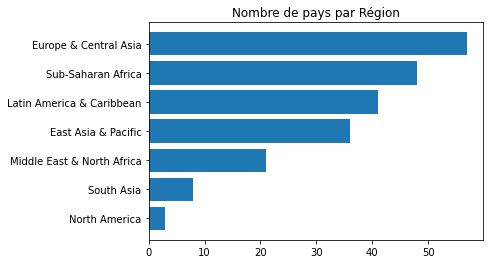

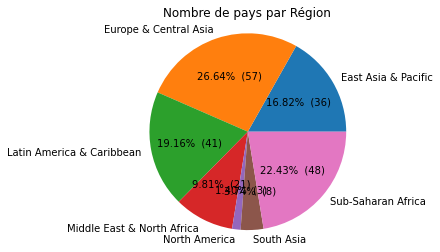

In [40]:
# graph chart
plt.title('Nombre de pays par Région')
#### PIE CHART 
plt.barh(y = df.groupby('Region')[['Country Name']].count().reset_index().sort_values(by='Country Name')['Region'], 
         width = df.groupby('Region')[['Country Name']].count()['Country Name'].sort_values())
plt.show()

# pie chart
repartition = df.groupby('Region')[['Country Name']].count()

fig1, ax1 = plt.subplots()
plt.title('Nombre de pays par Région')
ax1.pie(x=repartition["Country Name"], labels=repartition.index, autopct = make_autopct(repartition["Country Name"]))
#autopct='%1.f%%'
ax1.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

#### Nombre de pays par catégorie sociale

In [ ]:
df.groupby('Income Group')[['Country Name']].count()

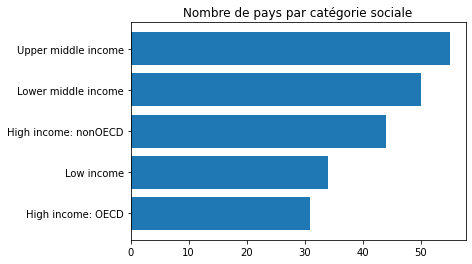

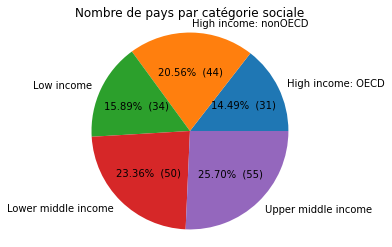

In [41]:
# graph chart
plt.title('Nombre de pays par catégorie sociale')
#### PIE CHART 
plt.barh(y = df.groupby('Income Group')[['Country Name']].count().reset_index().sort_values(by='Country Name')['Income Group'], 
         width = df.groupby('Income Group')[['Country Name']].count()['Country Name'].sort_values())
plt.show()


# pie chart
repartition = df.groupby('Income Group')[['Country Name']].count()

fig1, ax1 = plt.subplots()
plt.title('Nombre de pays par catégorie sociale')
ax1.pie(x=repartition["Country Name"], labels=repartition.index, autopct = make_autopct(repartition["Country Name"]))
#autopct='%1.f%%'
ax1.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

#### Catégorie sociale par région

In [42]:
df.groupby(['Income Group', 'Region'])[['Country Name']].count()

Country Name
Income Group         Region                                  
High income: OECD    East Asia & Pacific                    4
                     Europe & Central Asia                 23
                     Latin America & Caribbean              1
                     Middle East & North Africa             1
                     North America                          2
High income: nonOECD East Asia & Pacific                    8
                     Europe & Central Asia                 13
                     Latin America & Caribbean             14
                     Middle East & North Africa             7
                     North America                          1
                     Sub-Saharan Africa                     1
Low income           East Asia & Pacific                    3
                     Europe & Central Asia                  1
                     Latin America & Caribbean              1
                     South Asia                             3
                     Sub-Saharan Africa                    26
Lower middle income  East Asia & Pacific                   12
                     Europe & Central Asia                  7
                     Latin America & Caribbean              7
                     Middle East & North Africa             6
                     South Asia                             4
                     Sub-Saharan Africa                    14
Upper middle income  East Asia & Pacific                    9
                     Europe & Central Asia                 13
                     Latin America & Caribbean             18
                     Middle East & North Africa             7
                     South Asia                             1
                     Sub-Saharan Africa                     7

### Are there indicators that contains nothing but null/NA values ?

#### Nombre total de valeurs manquantes dans la dataframe `data`

In [43]:
print("Il y a", data.isnull().sum().sum(), 'valeurs nulles dans la table `data` sur', data.shape[0]*data.shape[1], ' valeurs, soit', round(data.isnull().sum().sum()/(data.shape[0]*data.shape[1])*100, 2), "% au total.")

Il y a 46922571 valeurs nulles dans la table `data` sur 57261960  valeurs, soit 81.94 % au total.


In [44]:
# table avec le nombre de valeurs manquantes par variables/années
data.isnull().sum()

Country Name           0
Country Code           0
Indicator Name         0
Indicator Code         0
1970              726724
                   ...  
2095              744177
2100              744177
Region             10995
Income Group       10995
total_Amount           0
Length: 72, dtype: int64

In [45]:
data.isnull()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2070,2075,2080,2085,2090,2095,2100,Region,Income Group,total_Amount
0,False,False,False,False,True,True,True,True,False,True,...,True,True,True,True,True,True,True,False,False,False
1,False,False,False,False,True,True,True,True,False,True,...,True,True,True,True,True,True,True,False,False,False
2,False,False,False,False,True,True,True,True,False,True,...,True,True,True,True,True,True,True,False,False,False
3,False,False,False,False,True,True,True,True,False,True,...,True,True,True,True,True,True,True,False,False,False
4,False,False,False,False,True,True,True,True,True,True,...,True,True,True,True,True,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795300,False,False,False,False,True,True,True,True,True,True,...,True,True,True,True,True,True,True,False,False,False
795301,False,False,False,False,True,True,True,True,True,True,...,True,True,True,True,True,True,True,False,False,False
795302,False,False,False,False,True,True,True,True,True,True,...,True,True,True,True,True,True,True,False,False,False
795303,False,False,False,False,True,True,True,True,True,True,...,True,True,True,True,True,True,True,False,False,False


In [46]:
# Find the percentage of missing values per columns
# Creation of a function that gives the percentage missing
def missing_perc(x):
    print (round((x.isnull().sum() * 100/ len(x)),2).sort_values(ascending=True))
x = missing_perc(data)

Country Name       0.00
Indicator Code     0.00
total_Amount       0.00
Country Code       0.00
Indicator Name     0.00
                  ...  
1972              96.02
1974              96.03
1973              96.05
2016              98.02
2017              99.98
Length: 72, dtype: float64


In [47]:
# Drop all the columns where >85% of the data is missing
colsToKeep = ['Country Name','Country Code', 'Indicator Name', 'Indicator Code', 'Region', 'Income Group','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013']
data_clean = data.loc[:,colsToKeep]

## Les indicateurs qui nous intéressent

In [109]:
indicateurs = ['UIS.E.3', 
'UIS.E.4',
'SP.POP.1524.TO.UN',
'IT.NET.USER.P2',
'UIS.PTRHC.3',
'UIS.PTRHC.56',
'NY.GDP.PCAP.CD',
'SE.XPD.TOTL.GD.ZS',
'SE.TER.ENRL',
'UIS.X.USCONST.3.FSGOV',
'SP.POP.TOTL',]

In [110]:
data_clean[data_clean['Indicator Code'].isin(indicateurs)][['Indicator Name', 'Indicator Code', '2010']].groupby(['Indicator Name', 'Indicator Code']).count().reset_index().sort_values(by='2010',ascending=False)

,Indicator Name,Indicator Code,2010
7,"Population, total",SP.POP.TOTL,215
3,GDP per capita (current US$),NY.GDP.PCAP.CD,203
5,Internet users (per 100 people),IT.NET.USER.P2,202
6,"Population, ages 15-24, total",SP.POP.1524.TO.UN,181
2,"Enrolment in upper secondary education, both s...",UIS.E.3,149
1,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,140
4,Government expenditure on education as % of GD...,SE.XPD.TOTL.GD.ZS,128
8,Pupil-teacher ratio in tertiary education (hea...,UIS.PTRHC.56,99
9,Pupil-teacher ratio in upper secondary educati...,UIS.PTRHC.3,78
0,Enrolment in post-secondary non-tertiary educa...,UIS.E.4,70


## Analyse des projections

In [111]:
data_clean = data[['Country Name', 'Country Code', 'Indicator Name', 
                   'Indicator Code', 'Region','Income Group','2010']]
#data_short[['Indicator Name', '2010']].groupby('Indicator Name').count().sort_values(by='2010',ascending=False)

In [112]:
data_clean.sample(10)

,Country Name,Country Code,Indicator Name,Indicator Code,Region,Income Group,2010
158086,Comoros,COM,"Barro-Lee: Population in thousands, age 35-39,...",BAR.POP.3539.FE,Sub-Saharan Africa,Low income,NaN
602196,Sao Tome and Principe,STP,"Enrolment in Grade 1 of primary education, fem...",UIS.E.1.G1.F,Sub-Saharan Africa,Lower middle income,2.700000e+03
286862,Guam,GUM,EGRA: Oral Reading Fluency - Share of students...,LO.EGRA.CWPM.ZERO.KAS.2GRD,East Asia & Pacific,High income: nonOECD,NaN
67224,Belgium,BEL,Government expenditure in educational institut...,UIS.XGDP.FSGOV.FDINSTADM.FFD,Europe & Central Asia,High income: OECD,6.096010e+00
658725,Sri Lanka,LKA,SABER: (Engaging the Private Sector) Policy Go...,SABER.PRVT.GOAL3,South Asia,Lower middle income,NaN
702526,Tanzania,TZA,"Population, ages 6-9, female",SP.POP.0609.FE.UN,Sub-Saharan Africa,Low income,2.551073e+06
254338,Gabon,GAB,LLECE: Female 3rd grade students by mathematic...,LO.LLECE.MAT3.2.FE,Sub-Saharan Africa,Upper middle income,NaN
162585,"Congo, Dem. Rep.",COD,"Gross enrolment ratio, primary and secondary, ...",SE.ENR.PRSC.FM.ZS,Sub-Saharan Africa,Low income,7.878100e-01
668426,St. Martin (French part),MAF,LLECE: 3rd grade students by reading proficien...,LO.LLECE.REA3.0,Latin America & Caribbean,High income: nonOECD,NaN
119613,Cabo Verde,CPV,Population of the official age for upper secon...,SP.SEC.UTOT.FE.IN,Sub-Saharan Africa,Lower middle income,1.831200e+04


In [113]:
data_clean2 = data[['Country Name', 'Country Code', 'Indicator Name', 
                   'Indicator Code', 'Region','Income Group','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013']]
data_clean2[data_clean2['Indicator Code'].isin(indicateurs)][['Country Name','Country Code', 'Indicator Name', 'Indicator Code', 'Region', 'Income Group','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013']].groupby(['Indicator Name', 'Indicator Code']).count().reset_index().sort_values(by='2010',ascending=False)

,Indicator Name,Indicator Code,Country Name,Country Code,Region,Income Group,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
7,"Population, total",SP.POP.TOTL,217,217,214,214,215,215,215,215,215,215,215,215,215,215,215,215,214,214
3,GDP per capita (current US$),NY.GDP.PCAP.CD,217,217,214,214,199,199,203,203,204,204,205,204,203,202,203,203,199,200
5,Internet users (per 100 people),IT.NET.USER.P2,217,217,214,214,196,197,199,193,196,198,197,204,203,202,202,204,202,201
6,"Population, ages 15-24, total",SP.POP.1524.TO.UN,217,217,214,214,190,191,192,192,191,191,187,181,181,181,181,181,181,181
2,"Enrolment in upper secondary education, both s...",UIS.E.3,217,217,214,214,148,149,150,146,157,157,150,155,152,152,149,154,152,140
1,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,217,217,214,214,124,123,133,134,134,129,129,129,134,137,140,142,141,131
4,Government expenditure on education as % of GD...,SE.XPD.TOTL.GD.ZS,217,217,214,214,121,117,126,113,125,112,112,113,123,122,128,121,113,118
8,Pupil-teacher ratio in tertiary education (hea...,UIS.PTRHC.56,217,217,214,214,103,97,101,94,98,89,92,89,91,101,99,106,107,101
9,Pupil-teacher ratio in upper secondary educati...,UIS.PTRHC.3,217,217,214,214,80,80,84,85,82,79,75,79,82,88,78,84,81,85
0,Enrolment in post-secondary non-tertiary educa...,UIS.E.4,217,217,214,214,86,88,78,81,78,75,70,76,75,73,70,71,74,83


In [114]:
data_clean[data_clean['Indicator Code'].isin(indicateurs)][['Indicator Name', 'Indicator Code', '2010']].groupby(['Indicator Name', 'Indicator Code']).count().reset_index().sort_values(by='2010',ascending=False)

,Indicator Name,Indicator Code,2010
7,"Population, total",SP.POP.TOTL,215
3,GDP per capita (current US$),NY.GDP.PCAP.CD,203
5,Internet users (per 100 people),IT.NET.USER.P2,202
6,"Population, ages 15-24, total",SP.POP.1524.TO.UN,181
2,"Enrolment in upper secondary education, both s...",UIS.E.3,149
1,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,140
4,Government expenditure on education as % of GD...,SE.XPD.TOTL.GD.ZS,128
8,Pupil-teacher ratio in tertiary education (hea...,UIS.PTRHC.56,99
9,Pupil-teacher ratio in upper secondary educati...,UIS.PTRHC.3,78
0,Enrolment in post-secondary non-tertiary educa...,UIS.E.4,70


In [115]:
# Création de la table finale pour faire les analyses
data_final = data_clean[data_clean['Indicator Code'].isin(indicateurs)][['Country Name', 'Country Code', 'Indicator Name', 
                   'Indicator Code', 'Region','Income Group','2010']]
data_final.sample(10)

,Country Name,Country Code,Indicator Name,Indicator Code,Region,Income Group,2010
303012,Guyana,GUY,"Population, ages 15-24, total",SP.POP.1524.TO.UN,Latin America & Caribbean,Lower middle income,1.125520e+05
301701,Guyana,GUY,Enrolment in post-secondary non-tertiary educa...,UIS.E.4,Latin America & Caribbean,Lower middle income,7.120000e+02
665918,St. Lucia,LCA,Pupil-teacher ratio in tertiary education (hea...,UIS.PTRHC.56,Latin America & Caribbean,Upper middle income,9.262910e+00
468008,Mexico,MEX,Pupil-teacher ratio in tertiary education (hea...,UIS.PTRHC.56,Latin America & Caribbean,Upper middle income,9.186510e+00
621939,Sierra Leone,SLE,Pupil-teacher ratio in upper secondary educati...,UIS.PTRHC.3,Sub-Saharan Africa,Low income,NaN
577938,Puerto Rico,PRI,"Population, total",SP.POP.TOTL,Latin America & Caribbean,High income: nonOECD,3.721525e+06
679239,Suriname,SUR,"Enrolment in upper secondary education, both s...",UIS.E.3,Latin America & Caribbean,Upper middle income,NaN
547460,Palau,PLW,Internet users (per 100 people),IT.NET.USER.P2,East Asia & Pacific,Upper middle income,NaN
114819,Burundi,BDI,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,Sub-Saharan Africa,Low income,2.926900e+04
477825,Monaco,MCO,Internet users (per 100 people),IT.NET.USER.P2,Europe & Central Asia,High income: nonOECD,7.500000e+01


## Partie analyse

In [116]:
# Description rapide des indicateurs (max, min, mean, etc.)
description = np.round(data_final.groupby('Indicator Name').describe(), 2)

In [117]:
## indicateur temporelles pour internet 
## Indicateur internet: tubes où se baladent 

In [118]:
data_clean.sample(5)

,Country Name,Country Code,Indicator Name,Indicator Code,Region,Income Group,2010
470511,"Micronesia, Fed. Sts.",FSM,LLECE: 3rd grade students by mathematics profi...,LO.LLECE.MAT3.0,East Asia & Pacific,Lower middle income,NaN
230527,Estonia,EST,UIS: Rate of out-of-school children of primary...,UIS.ROFST.H.1.Q5.F,Europe & Central Asia,High income: OECD,NaN
335124,Iraq,IRQ,MICS: Transition rate. Primary to Secondary. Q...,HH.MICS.TR.12.Q5,Middle East & North Africa,Upper middle income,NaN
668590,St. Martin (French part),MAF,MICS: Net attendance rate. Primary. Rural,HH.MICS.NAR.1.R,Latin America & Caribbean,High income: nonOECD,NaN
134203,Cayman Islands,CYM,PISA: Female 15-year-olds by reading proficien...,LO.PISA.REA.3.FE,Latin America & Caribbean,High income: nonOECD,NaN


In [119]:

data_clean2.sample(5)

,Country Name,Country Code,Indicator Name,Indicator Code,Region,Income Group,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
19607,Angola,AGO,Government expenditure per secondary student (...,UIS.XUNIT.PPPCONST.23.FSGOV,Sub-Saharan Africa,Upper middle income,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
588056,Russian Federation,RUS,"Net enrolment rate, secondary, gender parity i...",UIS.NER.23.GPI,Europe & Central Asia,High income: nonOECD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
161474,"Congo, Dem. Rep.",COD,Barro-Lee: Average years of tertiary schooling...,BAR.TER.SCHL.2024,Sub-Saharan Africa,Low income,0.03,NaN,NaN,NaN,NaN,0.01,NaN,NaN,NaN,NaN,0.02,NaN,NaN,NaN
374730,"Korea, Dem. People’s Rep.",PRK,EGRA: Listening Comprehension - Share of stude...,LO.EGRA.LSTN.0.SIL.2GRD,East Asia & Pacific,Low income,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
632617,Slovak Republic,SVK,PISA: Distribution of Mathematics Scores: 95th...,LO.PISA.MAT.P95,Europe & Central Asia,High income: OECD,NaN,NaN,NaN,648.44992,NaN,NaN,640.325596,NaN,NaN,653.645428,NaN,NaN,647.33606,NaN


In [120]:
min_internet = np.min(data_clean2[data_clean2['Indicator Name']=='Internet users (per 100 people)'][['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013']], axis=0)

In [121]:
max_internet = np.max(data_clean2[data_clean2['Indicator Name']=='Internet users (per 100 people)'][['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013']], axis=0)

In [122]:
mean_internet = np.mean(data_clean2[data_clean2['Indicator Name']=='Internet users (per 100 people)'][['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013']], axis=0)

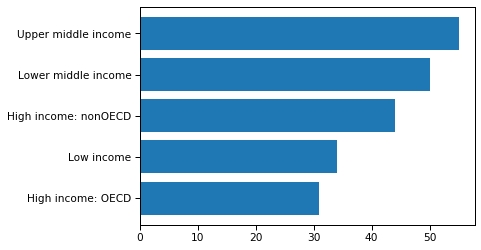

In [123]:
plt.barh(y = df.groupby('Income Group')[['Country Name']].count().reset_index().sort_values(by='Country Name')['Income Group'], 
         width = df.groupby('Income Group')[['Country Name']].count()['Country Name'].sort_values())
plt.show()

No handles with labels found to put in legend.


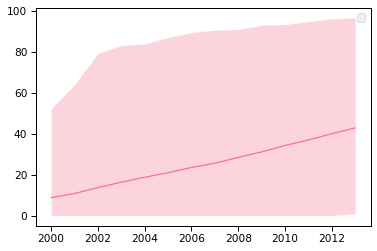

In [124]:
# qu'avec les données normalisées
fig, ax = plt.subplots()
clrs = sns.color_palette("husl", 5)
with sns.axes_style("darkgrid"):
    epochs = list(range(2000,2014))
    ax.plot(epochs, mean_internet, c=clrs[0])
    ax.fill_between(epochs, min_internet, max_internet ,alpha=0.3, facecolor=clrs[0])
    ax.legend()

In [129]:
data_clean2[data_clean2['Indicator Name']=='Internet users (per 100 people)'][['Country Name','2010']].sort_values(ascending=False, by = '2010').head(5)

,Country Name,2010
536465,Norway,93.39
320230,Iceland,93.39
510810,Netherlands,90.72
422850,Luxembourg,90.62
686730,Sweden,90.00


In [130]:
data_clean2[data_clean2['Indicator Name']=='Internet users (per 100 people)'][['Country Name','2010']].sort_values(ascending=True, by = '2010').head(5)

,Country Name,2010
375205,"Korea, Dem. People’s Rep.",0.00
496150,Myanmar,0.25
620760,Sierra Leone,0.58
224940,Eritrea,0.61
162635,"Congo, Dem. Rep.",0.72


<ipython-input-140-c40be0287a87>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x_norway = data_clean2[data_clean2['Indicator Name']=='Internet users (per 100 people)'][data_clean['Country Name']=='Norway'][['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013']].values.flatten()
<ipython-input-140-c40be0287a87>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x_iceland = data_clean2[data_clean2['Indicator Name']=='Internet users (per 100 people)'][data_clean['Country Name']=='Iceland'][['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013']].values.flatten()
<ipython-input-140-c40be0287a87>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x_netherlands = data_clean2[data_clean2['Indicator Name']=='Internet users (per 100 people)'][data_clean['Country Name']=='Netherlands'][['2000','2001','2002','2003',

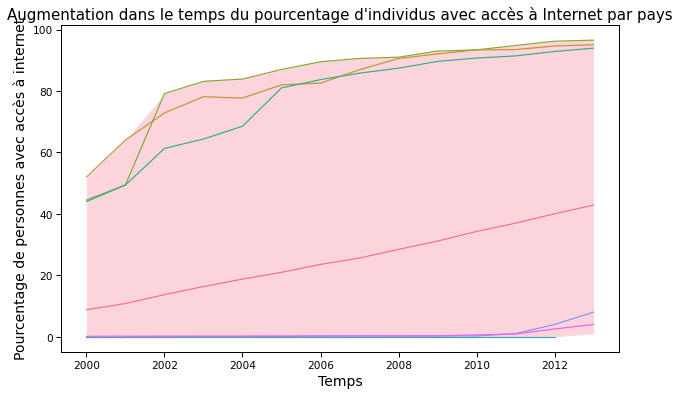

In [140]:
# internet indicator

# 3 meilleurs
x_norway = data_clean2[data_clean2['Indicator Name']=='Internet users (per 100 people)'][data_clean['Country Name']=='Norway'][['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013']].values.flatten()
x_iceland = data_clean2[data_clean2['Indicator Name']=='Internet users (per 100 people)'][data_clean['Country Name']=='Iceland'][['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013']].values.flatten()
x_netherlands = data_clean2[data_clean2['Indicator Name']=='Internet users (per 100 people)'][data_clean['Country Name']=='Netherlands'][['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013']].values.flatten()
# 3 pires
x_nkorea = data_clean2[data_clean2['Indicator Name']=='Internet users (per 100 people)'][data_clean['Country Name']=='Korea, Dem. People’s Rep.'][['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013']].values.flatten()
x_myanmar = data_clean2[data_clean2['Indicator Name']=='Internet users (per 100 people)'][data_clean['Country Name']=='Myanmar'][['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013']].values.flatten()
x_sierra = data_clean2[data_clean2['Indicator Name']=='Internet users (per 100 people)'][data_clean['Country Name']=='Sierra Leone'][['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013']].values.flatten()
# qu'avec les données normalisées



#fig, ax = plt.subplots()
plt.figure(figsize = (10,6))
ax = plt.gca()
fig.set_size_inches(18.5, 10.5, forward=True)
clrs = sns.color_palette("husl", 7) # 5 couleurs
with sns.axes_style("darkgrid"):
    epochs = list(range(2000,2014))
    ax.plot(epochs, mean_internet, c=clrs[0]) #clrs couleurs
    ax.plot(epochs, x_norway, c=clrs[1])
    ax.plot(epochs, x_iceland, c=clrs[2])
    ax.plot(epochs, x_netherlands, c=clrs[3])
    ax.plot(epochs, x_nkorea, c=clrs[4])
    ax.plot(epochs, x_myanmar, c=clrs[5])
    ax.plot(epochs, x_sierra, c=clrs[6])
    ax.fill_between(epochs, min_internet, max_internet ,alpha=0.3, facecolor=clrs[0])
    #ax.legend(loc='upper left', frameon=False)
    #handles, labels = ax.get_legend_handles_labels()
    #fig.legend(handles, labels, loc='upper center')
plt.title('Augmentation dans le temps du pourcentage d\'individus avec accès à Internet par pays', size=15)
plt.xlabel('Temps', size =14)
plt.ylabel('Pourcentage de personnes avec accès à internet', size = 14)
plt.show()

In [134]:
data_clean2[data_clean2['Indicator Code']=='UIS.PTRHC.3'][['Country Name','2010']].sort_values(ascending=True, by = '2010').head(5)

,Country Name,2010
79519,Bermuda,5.49173
574294,Portugal,6.83465
424029,Luxembourg,6.87772
101509,British Virgin Islands,7.04301
178474,Croatia,7.04985


In [135]:
data_clean2[data_clean2['Indicator Code']=='UIS.PTRHC.3'][['Country Name','2010']].sort_values(ascending=False, by = '2010').head(5)

,Country Name,2010
226119,Eritrea,35.265282
522984,Nicaragua,34.714489
233449,Ethiopia,32.571522
497329,Myanmar,28.300390
207794,Dominican Republic,27.199381


<ipython-input-181-af55dd3af3a0>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x_Bermuda = data_clean2[data_clean2['Indicator Code']=='UIS.PTRHC.3'][data_clean['Country Name']=='Bermuda'][['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013']].values.flatten()
<ipython-input-181-af55dd3af3a0>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x_Portugal = data_clean2[data_clean2['Indicator Code']=='UIS.PTRHC.3'][data_clean['Country Name']=='Portugal'][['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013']].values.flatten()
<ipython-input-181-af55dd3af3a0>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x_Luxembourg = data_clean2[data_clean2['Indicator Code']=='UIS.PTRHC.3'][data_clean['Country Name']=='Luxembourg'][['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2

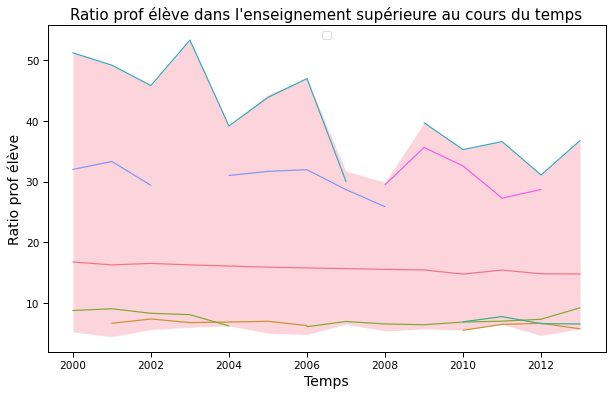

In [181]:
# ratio prof/élève indicator - tertiary education
min_ratioPupilTeacher = np.min(data_clean2[data_clean2['Indicator Code']=='UIS.PTRHC.3'][['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013']], axis=0)
max_ratioPupilTeacher = np.max(data_clean2[data_clean2['Indicator Code']=='UIS.PTRHC.3'][['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013']], axis=0)
mean_ratioPupilTeacher = np.mean(data_clean2[data_clean2['Indicator Code']=='UIS.PTRHC.3'][['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013']], axis=0)
# 3 meilleurs
x_Bermuda = data_clean2[data_clean2['Indicator Code']=='UIS.PTRHC.3'][data_clean['Country Name']=='Bermuda'][['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013']].values.flatten()
x_Portugal = data_clean2[data_clean2['Indicator Code']=='UIS.PTRHC.3'][data_clean['Country Name']=='Portugal'][['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013']].values.flatten()
x_Luxembourg = data_clean2[data_clean2['Indicator Code']=='UIS.PTRHC.3'][data_clean['Country Name']=='Luxembourg'][['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013']].values.flatten()
# 3 pires
x_Eritrea = data_clean2[data_clean2['Indicator Code']=='UIS.PTRHC.3'][data_clean['Country Name']=='Eritrea'][['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013']].values.flatten()
x_Nicaragua = data_clean2[data_clean2['Indicator Code']=='UIS.PTRHC.3'][data_clean['Country Name']=='Nicaragua'][['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013']].values.flatten()
x_Ethiopia = data_clean2[data_clean2['Indicator Code']=='UIS.PTRHC.3'][data_clean['Country Name']=='Ethiopia'][['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013']].values.flatten()
# qu'avec les données normalisées

#fig, ax = plt.subplots()
plt.figure(figsize = (10,6))
ax = plt.gca()
fig.set_size_inches(18.5, 10.5, forward=True)
clrs = sns.color_palette("husl", 7) # 5 couleurs
with sns.axes_style("darkgrid"):
    epochs = list(range(2000,2014))
    ax.plot(epochs, mean_ratioPupilTeacher, c=clrs[0]) #clrs couleurs
    ax.plot(epochs, x_Bermuda, c=clrs[1], label = "Bermuda")
    ax.legend()
    ax.plot(epochs, x_Portugal, c=clrs[2])
    ax.plot(epochs, x_Luxembourg, c=clrs[3])
    ax.plot(epochs, x_Eritrea, c=clrs[4])
    ax.plot(epochs, x_Nicaragua, c=clrs[5])
    ax.plot(epochs, x_Ethiopia, c=clrs[6])
    ax.fill_between(epochs, min_ratioPupilTeacher, max_ratioPupilTeacher ,alpha=0.3, facecolor=clrs[0])
    #ax.legend()
    
   
    #ax.legend()
    #ax.legend(loc='upper left', frameon=False)

#handles = [epochs]    
#handles = [x_Bermuda, x_Portugal,x_Luxembourg,x_Eritrea,x_Nicaragua,x_Ethiopia]
labels = ["x_Bermuda", "x_Portugal","x_Luxembourg","x_Eritrea","x_Nicaragua","x_Ethiopia"]
plt.title('Ratio prof élève dans l\'enseignement supérieure au cours du temps', size=15)
plt.xlabel('Temps', size =14)
plt.ylabel('Ratio prof élève', size = 14)
#ax.legend(loc='upper left', frameon=False)
ax.legend(handles, labels, loc='upper center')
plt.show()

[]

In [ ]:
#La liste pour la semaine prochaine:
#-- Faire la même chose avec les autres indicateurs normalisées
#-- nombre total e de la popultaion -- indicateur normalisé
#-- autres types --niveaeu revenu et richesse
#--  faire trois datasets différents pour les trois types de classifications
#-- courbe à chaque fois
#-- on reverra un classement pour un investissement. 

In [149]:
data_clean2[data_clean2['Indicator Code']=='UIS.PTRHC.56'][['Country Name','2010']].sort_values(ascending=True, by = '2010').head(5)

,Country Name,2010
182138,Cuba,5.24128
424028,Luxembourg,5.35458
691573,Switzerland,6.24063
83183,Bhutan,6.74724
24543,Antigua and Barbuda,6.76301


In [148]:
data_clean2[data_clean2['Indicator Code']=='UIS.PTRHC.56'][['Country Name','2010']].sort_values(ascending=False, by = '2010').head(5)

,Country Name,2010
127163,Cameroon,52.026211
658588,Sri Lanka,49.573132
460678,Mauritania,38.353561
728223,Turkey,33.476570
585288,Romania,32.135899


<ipython-input-160-c28ed95f5ea8>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x_Cuba = data_clean2[data_clean2['Indicator Code']=='UIS.PTRHC.56'][data_clean['Country Name']=='Cuba'][['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013']].values.flatten()
<ipython-input-160-c28ed95f5ea8>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x_Luxembourg = data_clean2[data_clean2['Indicator Code']=='UIS.PTRHC.56'][data_clean['Country Name']=='Luxembourg'][['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013']].values.flatten()
<ipython-input-160-c28ed95f5ea8>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x_Switzerland = data_clean2[data_clean2['Indicator Code']=='UIS.PTRHC.56'][data_clean['Country Name']=='Switzerland'][['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011'

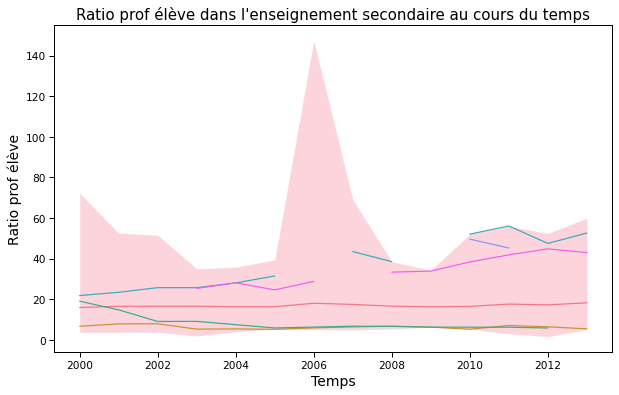

In [160]:
# ratio prof/élève indicator - secondary education
min_ratioPupilTeacher2 = np.min(data_clean2[data_clean2['Indicator Code']=='UIS.PTRHC.56'][['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013']], axis=0)
max_ratioPupilTeacher2 = np.max(data_clean2[data_clean2['Indicator Code']=='UIS.PTRHC.56'][['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013']], axis=0)
mean_ratioPupilTeacher2 = np.mean(data_clean2[data_clean2['Indicator Code']=='UIS.PTRHC.56'][['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013']], axis=0)
# 3 meilleurs
x_Cuba = data_clean2[data_clean2['Indicator Code']=='UIS.PTRHC.56'][data_clean['Country Name']=='Cuba'][['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013']].values.flatten()
x_Luxembourg = data_clean2[data_clean2['Indicator Code']=='UIS.PTRHC.56'][data_clean['Country Name']=='Luxembourg'][['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013']].values.flatten()
x_Switzerland = data_clean2[data_clean2['Indicator Code']=='UIS.PTRHC.56'][data_clean['Country Name']=='Switzerland'][['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013']].values.flatten()
# 3 pires
x_Cameroon = data_clean2[data_clean2['Indicator Code']=='UIS.PTRHC.56'][data_clean['Country Name']=='Cameroon'][['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013']].values.flatten()
x_SriLanka = data_clean2[data_clean2['Indicator Code']=='UIS.PTRHC.56'][data_clean['Country Name']=='Sri Lanka'][['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013']].values.flatten()
x_Mauritania = data_clean2[data_clean2['Indicator Code']=='UIS.PTRHC.56'][data_clean['Country Name']=='Mauritania'][['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013']].values.flatten()
# qu'avec les données normalisées


#fig, ax = plt.subplots()
plt.figure(figsize = (10,6))
ax = plt.gca()
fig.set_size_inches(18.5, 10.5, forward=True)
clrs = sns.color_palette("husl", 7) # 5 couleurs
with sns.axes_style("darkgrid"):
    epochs = list(range(2000,2014))
    ax.plot(epochs, mean_ratioPupilTeacher2, c=clrs[0]) #clrs couleurs
    ax.plot(epochs, x_Cuba, c=clrs[1])
    ax.plot(epochs, x_Luxembourg, c=clrs[2])
    ax.plot(epochs, x_Switzerland, c=clrs[3])
    ax.plot(epochs, x_Cameroon, c=clrs[4])
    ax.plot(epochs, x_SriLanka, c=clrs[5])
    ax.plot(epochs, x_Mauritania, c=clrs[6])
    ax.fill_between(epochs, min_ratioPupilTeacher2, max_ratioPupilTeacher2 ,alpha=0.3, facecolor=clrs[0])
    #ax.legend(loc='upper left', frameon=False)
    #handles, labels = ax.get_legend_handles_labels()
    #fig.legend(handles, labels, loc='upper center')
plt.title('Ratio prof élève dans l\'enseignement secondaire au cours du temps', size=15)
plt.xlabel('Temps', size =14)
plt.ylabel('Ratio prof élève', size = 14)
plt.show()

In [159]:
data_clean2[data_clean2['Indicator Code']=='UIS.E.3'][['Country Name','2010']].sort_values(ascending=True, by = '2010').head(5)
data_clean2[data_clean2['Indicator Code']=='UIS.E.3'][['Country Name','2010']].sort_values(ascending=False, by = '2010').head(5)

,Country Name,2010
323734,India,48265864.0
151479,China,44693168.0
756204,United States,11701279.0
96504,Brazil,9284000.0
327399,Indonesia,8179071.0


In [164]:
print(data_clean2[data_clean2['Indicator Code']=='SE.XPD.TOTL.GD.ZS'][['Country Name','2010']].sort_values(ascending=False, by = '2010').head(5));
print()
print(data_clean2[data_clean2['Indicator Code']=='SE.XPD.TOTL.GD.ZS'][['Country Name','2010']].sort_values(ascending=True, by = '2010').head(5))

                 Country Name      2010
180845                   Cuba  12.83727
708605            Timor-Leste  10.38706
638970        Solomon Islands  10.00108
602320  Sao Tome and Principe   9.65841
474045                Moldova   9.11211
195505                Denmark   8.61151
499700                Namibia   8.34961
85555                 Bolivia   7.59326
320115                Iceland   7.20557
518025            New Zealand   7.01147
114875                Burundi   6.80531
536350                 Norway   6.75019
34245                   Aruba   6.71249
169850             Costa Rica   6.63341
686615                 Sweden   6.62198
70895                  Belize   6.61330
188175                 Cyprus   6.58025
243150                Finland   6.54421
609650                Senegal   6.50321
452055                  Malta   6.45489

                    Country Name     2010
136865  Central African Republic  1.20409
477710                    Monaco  1.32022
122205                  Cambodia 

<ipython-input-165-23c834f632df>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x_Cuba = data_clean2[data_clean2['Indicator Code']=='SE.XPD.TOTL.GD.ZS'][data_clean['Country Name']=='Cuba'][['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013']].values.flatten()
<ipython-input-165-23c834f632df>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x_Timor = data_clean2[data_clean2['Indicator Code']=='SE.XPD.TOTL.GD.ZS'][data_clean['Country Name']=='Timor-Leste'][['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013']].values.flatten()
<ipython-input-165-23c834f632df>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x_Solomon = data_clean2[data_clean2['Indicator Code']=='SE.XPD.TOTL.GD.ZS'][data_clean['Country Name']=='Solomon Islands'][['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2

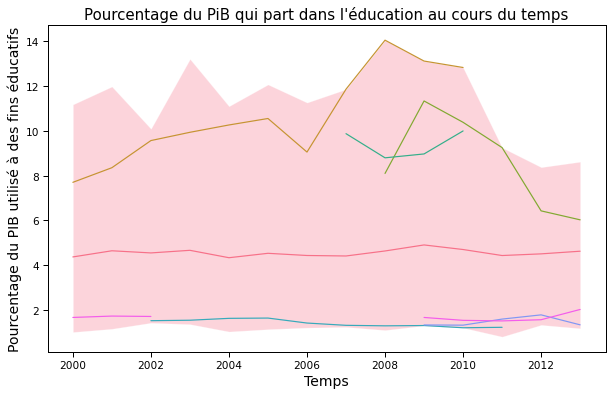

In [165]:
# ¨Pourcentage du pib qui part dans l'éducation 
min_govhelp = np.min(data_clean2[data_clean2['Indicator Code']=='SE.XPD.TOTL.GD.ZS'][['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013']], axis=0)
max_govhelp = np.max(data_clean2[data_clean2['Indicator Code']=='SE.XPD.TOTL.GD.ZS'][['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013']], axis=0)
mean_govhelp = np.mean(data_clean2[data_clean2['Indicator Code']=='SE.XPD.TOTL.GD.ZS'][['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013']], axis=0)
# 3 meilleurs
x_Cuba = data_clean2[data_clean2['Indicator Code']=='SE.XPD.TOTL.GD.ZS'][data_clean['Country Name']=='Cuba'][['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013']].values.flatten()
x_Timor = data_clean2[data_clean2['Indicator Code']=='SE.XPD.TOTL.GD.ZS'][data_clean['Country Name']=='Timor-Leste'][['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013']].values.flatten()
x_Solomon = data_clean2[data_clean2['Indicator Code']=='SE.XPD.TOTL.GD.ZS'][data_clean['Country Name']=='Solomon Islands'][['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013']].values.flatten()
# 3 pires
x_CentrAf = data_clean2[data_clean2['Indicator Code']=='SE.XPD.TOTL.GD.ZS'][data_clean['Country Name']=='Central African Republic'][['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013']].values.flatten()
x_Monaco = data_clean2[data_clean2['Indicator Code']=='SE.XPD.TOTL.GD.ZS'][data_clean['Country Name']=='Monaco'][['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013']].values.flatten()
x_Cambodia = data_clean2[data_clean2['Indicator Code']=='SE.XPD.TOTL.GD.ZS'][data_clean['Country Name']=='Cambodia'][['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013']].values.flatten()
# qu'avec les données normalisées


#fig, ax = plt.subplots()
plt.figure(figsize = (10,6))
ax = plt.gca()
fig.set_size_inches(18.5, 10.5, forward=True)
clrs = sns.color_palette("husl", 7) # 5 couleurs
with sns.axes_style("darkgrid"):
    epochs = list(range(2000,2014))
    ax.plot(epochs, mean_govhelp, c=clrs[0]) #clrs couleurs
    ax.plot(epochs, x_Cuba, c=clrs[1])
    ax.plot(epochs, x_Timor, c=clrs[2])
    ax.plot(epochs, x_Solomon, c=clrs[3])
    ax.plot(epochs, x_CentrAf, c=clrs[4])
    ax.plot(epochs, x_Monaco, c=clrs[5])
    ax.plot(epochs, x_Cambodia, c=clrs[6])
    ax.fill_between(epochs, min_govhelp, max_govhelp ,alpha=0.3, facecolor=clrs[0])
    #ax.legend(loc='upper left', frameon=False)
    #handles, labels = ax.get_legend_handles_labels()
    #fig.legend(handles, labels, loc='upper center')
plt.title('Pourcentage du PiB qui part dans l\'éducation au cours du temps', size=15)
plt.xlabel('Temps', size =14)
plt.ylabel('Pourcentage du PIB utilisé à des fins éducatifs', size = 14)
plt.show()